In [17]:
import numpy as np
import matplotlib.pyplot as plt

from utility import *
from theoretical import *
from scipy.stats import sem

In [18]:
np.random.seed(4198)
S_0, K, r, T, sig = 50.0, 60.0, 0.05, 1.0, 0.2

In [19]:
def european_call_plain(n, K):
    # Simulate asset prices at maturity
    Z = np.random.normal(0, 1, n)
    S_T = S_0 * np.exp((r - 0.5 * sig**2) * T + sig * np.sqrt(T) * Z)
    
    payoffs = np.maximum(S_T - K, 0)
    discounted_payoffs = np.exp(-r * T) * payoffs

    est = np.mean(discounted_payoffs)
    se = sem(discounted_payoffs)
    re = se / np.abs(est)

    return est, se, re

In [20]:
ns = [10**i for i in range(2, 7)]
ests = []
ses = []
res = []
for n in ns:
    est, se, re = european_call_plain(n, K)
    ests.append(est)
    ses.append(se)
    res.append(re)

In [21]:
# Print Results
for n, est, se, re in zip(ns, ests, ses, res):
    print(f"Sample Size: {n}, Estimate: {est:.4f}, Standard Error: {se:.4f}, Relative Error: {re:.4f}")

Sample Size: 100, Estimate: 2.0756, Standard Error: 0.4202, Relative Error: 0.2024
Sample Size: 1000, Estimate: 1.5780, Standard Error: 0.1368, Relative Error: 0.0867
Sample Size: 10000, Estimate: 1.6041, Standard Error: 0.0428, Relative Error: 0.0267
Sample Size: 100000, Estimate: 1.6370, Standard Error: 0.0137, Relative Error: 0.0084
Sample Size: 1000000, Estimate: 1.6248, Standard Error: 0.0043, Relative Error: 0.0027


In [22]:
theoretical = european_call(S_0, K, r, T, sig)
print(f"Theoretical Price: {theoretical:.4f}")

Theoretical Price: 1.6237


In [23]:
def asian_call_plain(m, n):
    dt = T / m
    discount_factor = np.exp(-r * T)
    
    payoffs = []
    Z = np.random.normal(0, 1, (n, m))
    W_t = np.cumsum(Z, axis=1)
    S_t = S_0 * np.exp((r - 0.5 * sig**2) * (np.arange(1, m + 1) * dt) + sig * np.sqrt(dt) * W_t)
    S_avg = np.mean(S_t, axis=1)

    payoffs = np.maximum(S_avg - K, 0)
    discounted_payoffs = discount_factor * payoffs

    est = np.mean(discounted_payoffs)
    se = sem(discounted_payoffs)
    re = se / np.abs(est)

    return est, se, re

In [24]:
ns_asian = [10**i for i in range(2, 7)]
ests_asian = []
ses_asian = []
res_asian = []
m = 100  # Number of time steps
for n in ns_asian:
    est, se, re = asian_call_plain(m, n)
    ests_asian.append(est)
    ses_asian.append(se)
    res_asian.append(re)

In [25]:
# Print Results for Asian Call Option
for n, est, se, re in zip(ns_asian, ests_asian, ses_asian, res_asian):
    print(f"Sample Size: {n}, Estimate: {est:.4f}, Standard Error: {se:.4f}, Relative Error: {re:.4f}")

Sample Size: 100, Estimate: 0.0847, Standard Error: 0.0586, Relative Error: 0.6913
Sample Size: 1000, Estimate: 0.3056, Standard Error: 0.0398, Relative Error: 0.1303
Sample Size: 10000, Estimate: 0.2507, Standard Error: 0.0116, Relative Error: 0.0464
Sample Size: 100000, Estimate: 0.2804, Standard Error: 0.0041, Relative Error: 0.0146
Sample Size: 1000000, Estimate: 0.2698, Standard Error: 0.0013, Relative Error: 0.0046


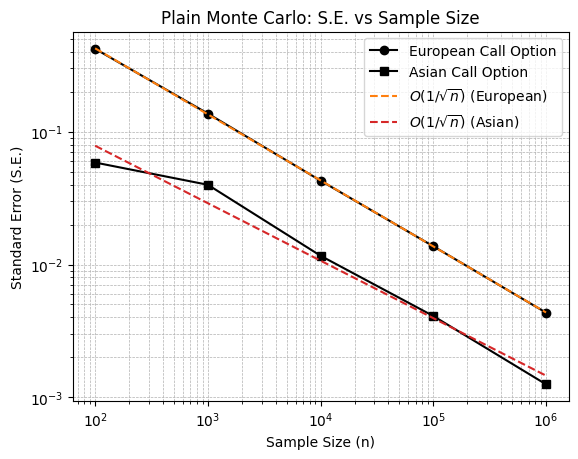

In [26]:
# Plot Standard Error vs Sample Size
plt.loglog(ns, ses, color='black', marker='o', label='European Call Option')
plt.loglog(ns, ses_asian, color='black', marker='s', label='Asian Call Option')

# Plot reference lines for O(1/sqrt(n))
n_ref = np.array(ns)

m, b = np.polyfit(np.log10(n_ref), np.log10(ses), 1)
se_ref = 10**b * n_ref**m
plt.loglog(n_ref, se_ref, color='tab:orange', linestyle='--', label=r'$O(1/\sqrt{n})$ (European)')

n_ref_asian = np.array(ns_asian)

m_asian, b_asian = np.polyfit(np.log10(n_ref_asian), np.log10(ses_asian), 1)
se_ref_asian = 10**b_asian * n_ref_asian**m_asian
plt.loglog(n_ref_asian, se_ref_asian, color='tab:red', linestyle='--', label=r'$O(1/\sqrt{n})$ (Asian)')

plt.xlabel('Sample Size (n)')
plt.ylabel('Standard Error (S.E.)')
plt.title('Plain Monte Carlo: S.E. vs Sample Size')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.savefig('../report/assets/plain-monte-carlo-se-vs-sample-size.png')

In [27]:
N = 10_000
K_values = np.linspace(40, 80, 8 + 1)

res = []
for K in K_values:
    est, se, re = european_call_plain(N, K)
    theo = european_call(S_0, K, r, T, sig)
    res.append(re)
    print(f"Strike: {K}, Estimate: {est:.4f}, Theoretical: {theo:.4f}, Standard Error: {se:.4f}, Relative Error: {re:.2%}")

Strike: 40.0, Estimate: 12.2491, Theoretical: 12.2944, Standard Error: 0.0961, Relative Error: 0.78%
Strike: 45.0, Estimate: 8.2301, Theoretical: 8.3497, Standard Error: 0.0849, Relative Error: 1.03%
Strike: 50.0, Estimate: 5.2054, Theoretical: 5.2253, Standard Error: 0.0742, Relative Error: 1.43%
Strike: 55.0, Estimate: 2.9767, Theoretical: 3.0200, Standard Error: 0.0574, Relative Error: 1.93%
Strike: 60.0, Estimate: 1.5574, Theoretical: 1.6237, Standard Error: 0.0419, Relative Error: 2.69%
Strike: 65.0, Estimate: 0.8574, Theoretical: 0.8198, Standard Error: 0.0317, Relative Error: 3.70%
Strike: 70.0, Estimate: 0.4268, Theoretical: 0.3925, Standard Error: 0.0232, Relative Error: 5.44%
Strike: 75.0, Estimate: 0.2005, Theoretical: 0.1798, Standard Error: 0.0148, Relative Error: 7.39%
Strike: 80.0, Estimate: 0.0734, Theoretical: 0.0795, Standard Error: 0.0084, Relative Error: 11.42%


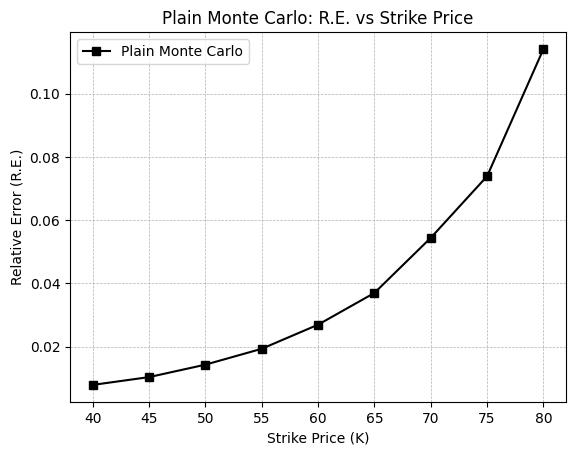

In [28]:
# Plot R.E. vs. Strike Price
plt.plot(K_values, res, color='black', marker='s', label='Plain Monte Carlo')
plt.xlabel('Strike Price (K)')
plt.ylabel('Relative Error (R.E.)')
plt.title('Plain Monte Carlo: R.E. vs Strike Price')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.savefig('../report/assets/plain-monte-carlo-re-vs-strike-price.png')